In [45]:
#We have seen first-hand the kind of destruction and anarchy fake news can cause in society. 
#There are many sources through which the news procured should always be taken with a grain of salt. 
#We could be using NLP (or natural language processing) library’s TfidfVectorizer to build and 
#train a PassiveAggressiveClassifier, which would be doing all the work of detecting fake news.



from sklearn.feature_extraction.text import TfidfVectorizer
#tf idf- we need to convert those strings to numbers based o their importance(or feature)
#we us etf - idf vectorization to convert those text to vector of importance 

# with tf idf we can extract important words in our data . it assign rarely occuring words
# a high number and frequently ocuuring words a very low number

text = ['Hello , I love machine learning','Welcome to the Machine learning hub' ]

In [46]:
vect = TfidfVectorizer()

In [3]:
import pandas as pd

In [4]:
dataframe = pd.read_csv('news.csv')
dataframe.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [5]:
x = dataframe['text']
y = dataframe['label']

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
#tf idf- we need to convert those strings to numbers based o their importance(or feature)
#we us etf - idf vectorization to convert those text to vector of importance 

# with tf idf we can extract important words in our data . it assign rarely occuring words
# a high number and frequently ocuuring words a very low number
from sklearn.linear_model import PassiveAggressiveClassifier

#The Passive-Aggressive algorithms are a family of Machine learning algorithms that are not very well known by beginners and even intermediate Machine Learning enthusiasts. 
#However, they can be very useful and efficient for certain applications.
#Passive-Aggressive algorithms are generally used for large-scale learning. 
#It is one of the few ‘online-learning algorithms‘. In online machine learning algorithms,
#the input data comes in sequential order and the machine learning model is updated step-by-step,
#as opposed to batch learning, where the entire training dataset is used at once. 
#This is very useful in situations where there is a huge amount of data and it is computationally infeasible to train the entire dataset because of the sheer size of the data. 
#We can simply say that an online-learning algorithm will get a training example, update the classifier, and then throw away the example.

#Passive: If the prediction is correct, keep the model and do not make any changes. i.e., the data in the example is not enough to cause any changes in the model. 
#Aggressive: If the prediction is incorrect, make changes to the model. i.e., some change to the model may correct it.

from sklearn.metrics import accuracy_score, confusion_matrix

In [7]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)
y_train

2402    REAL
1922    REAL
3475    FAKE
6197    REAL
4748    FAKE
        ... 
4931    REAL
3264    REAL
1653    FAKE
2607    FAKE
2732    REAL
Name: label, Length: 5068, dtype: object

In [8]:
tfvect = TfidfVectorizer(stop_words='english',max_df=0.7)


#max_df = 
# max_df is used for removing terms that appear too frequently
#max_df = 0.50 means "ignore terms that appear in more than 50% of the documents".

tfid_x_train = tfvect.fit_transform(x_train)
tfid_x_test = tfvect.transform(x_test)

In [9]:
classifier = PassiveAggressiveClassifier(max_iter=50)
classifier.fit(tfid_x_train,y_train)

PassiveAggressiveClassifier(C=1.0, average=False, class_weight=None,
                            early_stopping=False, fit_intercept=True,
                            loss='hinge', max_iter=50, n_iter_no_change=5,
                            n_jobs=None, random_state=None, shuffle=True,
                            tol=0.001, validation_fraction=0.1, verbose=0,
                            warm_start=False)

In [10]:
y_pred = classifier.predict(tfid_x_test)
score = accuracy_score(y_test,y_pred)
print(f'Accuracy: {round(score*100,2)}%')

Accuracy: 93.29%


In [30]:
cf = confusion_matrix(y_test,y_pred, labels=['FAKE','REAL'])
print(cf) 
#tn fp
#fn tp

[[568  47]
 [ 38 614]]


[[568  47]
 [ 38 614]]


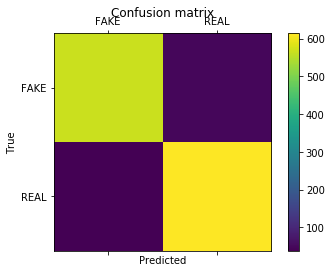

In [43]:
import matplotlib.pyplot as plt
labels=['FAKE','REAL']
cf = confusion_matrix(y_test, y_pred, labels=['FAKE','REAL'])
print(cf)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cf)
plt.title('Confusion matrix')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


In [44]:
def fake_news_det(news):
    input_data = [news]
    vectorized_input_data = tfvect.transform(input_data)
    prediction = classifier.predict(vectorized_input_data)
    print(prediction)

In [13]:
fake_news_det('U.S. Secretary of State John F. Kerry said Monday that he will stop in Paris later this week, amid criticism that no top American officials attended Sundayâ€™s unity march against terrorism.')

['REAL']


In [14]:
fake_news_det("""Go to Article 
President Barack Obama has been campaigning hard for the woman who is supposedly going to extend his legacy four more years. The only problem with stumping for Hillary Clinton, however, is sheâ€™s not exactly a candidate easy to get too enthused about.  """)

['FAKE']


In [15]:
import pickle
pickle.dump(classifier,open('model.pkl', 'wb'))

In [16]:
def fake_news_det1(news):
    input_data = [news]
    vectorized_input_data = tfvect.transform(input_data)
    prediction = classifier.predict(vectorized_input_data)
    print(prediction)

In [17]:
fake_news_det1("""Go to Article President Barack Obama has been campaigning hard for the woman who is supposedly going to extend his legacy four more years. The only problem with stumping for Hillary Clinton, however, is sheâ€™s not exactly a candidate easy to get too enthused about.  """)

['FAKE']


In [18]:
fake_news_det('''U.S. Secretary of State John F. Kerry said Monday that he will stop in Paris later this week, amid criticism that no top American officials attended Sundayâ€™s unity march against terrorism.''')

['REAL']
